# Convert Training data toNumPy arrays

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import os
import pickle
from sklearn.model_selection import KFold

In [ ]:
def toNumpy(dir):
    out = np.empty([0,43200], np.uint8, 'C')
    print(out.shape)

    label = []
    diction = {}
    dirs = os.listdir(dir)

    for img in dirs:
      print(img)
      path = dir+"/"+img

      if path.endswith(".jpg"):
        I = cv2.imread(path)
        I = cv2.resize(I, dsize=(120,120))
        im = (np.array(I))
        r = im[:, :, 0].flatten()
        g = im[:, :, 1].flatten()
        b = im[:, :, 2].flatten()
        a = [list(r) + list(g) + list(b)]
        b = np.asarray(a)
        
        label_name = int(img.split('_')[-2][8:])
        print(label_name)

        out = np.append(out, b, axis=0)
        label.append(label_name)

    diction['data'] = out
    diction['labels'] = label
    print(out)
    print('shape = ' + str(out.shape))
    print(label)
    print(len(label))


    with open('/content/drive/MyDrive/PSL dataset/train_numpy120', 'wb') as fout:
        pickle.dump(diction, fout)

In [ ]:
toNumpy('/content/drive/MyDrive/VideoFrames/TrainingFrames/')

Streaming output truncated to the last 5000 lines.
front_Student5_sentence12_5.jpg
12
front_Student5_sentence12_6.jpg
12
front_Student5_sentence12_7.jpg
12
front_Moiz_sentence12_9.jpg
12
front_Moiz_sentence12_8.jpg
12
front_Student5_sentence12_8.jpg
12
front_Student5_sentence12_9.jpg
12
front_Student5_sentence12_10.jpg
12
front_Moiz_sentence12_11.jpg
12
front_Moiz_sentence12_10.jpg
12
front_Student5_sentence12_11.jpg
12
front_Student5_sentence12_12.jpg
12
front_Moiz_sentence12_13.jpg
12
front_Moiz_sentence12_12.jpg
12
front_Student5_sentence12_13.jpg
12
front_Student5_sentence12_14.jpg
12
front_Moiz_sentence12_14.jpg
12
front_Moiz_sentence12_15.jpg
12
front_Student5_sentence12_15.jpg
12
front_Moiz_sentence12_17.jpg
12
front_Moiz_sentence12_16.jpg
12
front_Student5_sentence12_16.jpg
12
front_Student5_sentence12_17.jpg
12
front_Moiz_sentence12_18.jpg
12
front_Moiz_sentence12_19.jpg
12
front_Student5_sentence12_18.jpg
12
front_Student5_sentence12_19.jpg
12
front_Moiz_sentence13_3.jpg
13
f

# Convert Testing data toNumPy arrays

In [ ]:
import cv2
import numpy as np
import os
import pickle

def toNumpy(dir):
    out = np.empty([0,43200], np.uint8, 'C')
    print(out.shape)

    label = []
    diction = {}
    dirs = os.listdir(dir)

    for img in dirs:
      print(img)
      path = dir+"/"+img

      if path.endswith(".jpg"):
        I = cv2.imread(path)
        I = cv2.resize(I, dsize=(120,120))
        im = (np.array(I))
        r = im[:, :, 0].flatten()
        g = im[:, :, 1].flatten()
        b = im[:, :, 2].flatten()
        a = [list(r) + list(g) + list(b)]
        b = np.asarray(a)
        
        label_name = int(img.split('_')[-2][8:])
        print(label_name)

        out = np.append(out, b, axis=0)
        label.append(label_name)

    diction['data'] = out
    diction['labels'] = label
    print(diction.items())
    print('shape = ' + str(out.shape))


    with open('/content/drive/MyDrive/PSL dataset/test_numpy120', 'wb') as fout:
        pickle.dump(diction, fout)

In [ ]:
toNumpy('/content/drive/MyDrive/VideoFrames/TestingFrames/')

# Data Pre-processing

open training data

In [ ]:
#open numpy arrays file
file_path = '/content/drive/MyDrive/PSL dataset/train_numpy120' #bg_train_numpy120

with open(file_path, mode='rb') as file:
  # In Python 3.X it is important to set the encoding,
  # otherwise an exception is raised here.
  datadict = pickle.load(file, encoding='bytes')

In [ ]:
#seperate data and labels
data = datadict['data']
labels = np.array(datadict['labels'])
print(len(data), len(labels))

#print unique labels
print(np.unique(labels))

#print data shape
print(data.shape)

5778 5778
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(5778, 43200)


open testing data

In [ ]:
with open('/content/drive/MyDrive/PSL dataset/test_numpy120', mode='rb') as dir: #bg_test_numpy120
  # In Python 3.X it is important to set the encoding,
  # otherwise an exception is raised here.
  test_data = pickle.load(dir, encoding='bytes')

X_test = test_data['data']
y_test = np.array(test_data['labels'])

print(len(X_test), len(y_test))

629 629


Merge train and test data

In [ ]:
data = np.concatenate((data, X_test))
labels = np.concatenate((labels, y_test))

data.shape, labels.shape

((6407, 43200), (6407,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


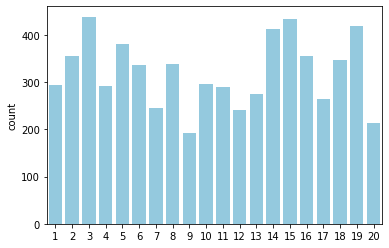

In [ ]:
import seaborn as sns
sns.countplot(labels, color='skyblue');

In [ ]:
data = data.reshape(data.shape[0],120,120,3)

(data.shape, labels.shape)

((6407, 120, 120, 3), (6407,))

In [ ]:
#convert the pixel type from int to float32
data = data.astype('float32')

#rescale the pixel values between 0 and 1
data = data / 255.

In [ ]:
!pip uninstall keras
!pip install keras==2.4.0
#keras.__version__

In [ ]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
labels_one_hot = to_categorical(labels)

# Display the change for category label using one-hot encoding
print('Original label:', labels[0])
print('After conversion to one-hot:', labels_one_hot[0])

In [ ]:
dict_encoded = {}
dict_encoded['data'] = data
dict_encoded['labels'] = labels_one_hot

with open('/content/drive/MyDrive/PSL dataset/pre_processed_data', 'wb') as fout: #bg_pre_processed_data
  pickle.dump(dict_encoded, fout)

In [ ]:
with open('/content/drive/MyDrive/PSL dataset/pre_processed_data', mode='rb') as dir: #bg_pre_processed_data
  # In Python 3.X it is important to set the encoding,
  # otherwise an exception is raised here.
  processed_data = pickle.load(dir, encoding='bytes')

data = processed_data['data']
labels_one_hot = np.array(processed_data['labels'])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

#split the data into train and test sets

splitData = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=None)

for train_index, test_index in splitData.split(data, labels_one_hot):
  #print("TRAIN:", train_index, "Test:", test_index)
  X, X_test = data[train_index], data[test_index]
  y, y_test = labels_one_hot[train_index], labels_one_hot[test_index]

print((X.shape, y.shape), (X_test.shape, y_test.shape))

((4805, 120, 120, 3), (4805, 21)) ((1602, 120, 120, 3), (1602, 21))


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

#split the data into train and test sets

splitData = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=None)

for train_index, valid_index in splitData.split(X, y):
  #print("TRAIN:", train_index, "Validation:", valid_index)
  X_train, X_valid = X[train_index], X[valid_index]
  y_train, y_valid = y[train_index], y[valid_index]

print((X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape))

((4084, 120, 120, 3), (4084, 21)) ((721, 120, 120, 3), (721, 21))


In [ ]:
#from sklearn.model_selection import train_test_split

#split training data into training and validation set 
#X_train,X_valid,y_train,y_valid = train_test_split(data, labels_one_hot, test_size=0.20, random_state=0, stratify=labels_one_hot)
#(X_train.shape,y_train.shape), (X_valid.shape,y_valid.shape)

(((4622, 120, 120, 3), (4622, 21)), ((1156, 120, 120, 3), (1156, 21)))

# Training model

In [ ]:
!pip uninstall keras
!pip install keras==2.5.0
#keras.__version__

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=3)
cvscores = []
for train, test in kfold.split(X_train, train_Y_one_hot):

  #define model (CNN model)
  sign_model = Sequential()
  sign_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))                  
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Flatten())
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  sign_model.add(Dropout(0.4))
  sign_model.add(Dense(21, activation='softmax'))

  #compile model
  sign_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

  #fit the model
  sign_train_dropout = sign_model.fit(X_train[train], train_Y_one_hot[train], batch_size=128, epochs=100, verbose=0)

  #evaluate the model
  scores = sign_model.evaluate(X_train[test], train_Y_one_hot[test], verbose=0)

  print("%s: %.2f%%" % (sign_model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)

#mean and std of kflod accuracy
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [ ]:
batch_size = 64
epochs = 2000
num_classes = 21

In [ ]:
#CNN model
sign_model = Sequential()
sign_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(120,120,3)))
sign_model.add(LeakyReLU(alpha=0.1))
sign_model.add(MaxPooling2D((2, 2),padding='same'))
sign_model.add(Dropout(0.3))
sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
sign_model.add(LeakyReLU(alpha=0.1))
sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sign_model.add(Dropout(0.3))
sign_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
sign_model.add(LeakyReLU(alpha=0.1))                  
sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sign_model.add(Dropout(0.5))
sign_model.add(Flatten())
sign_model.add(Dense(128, activation='linear'))
sign_model.add(LeakyReLU(alpha=0.1))           
sign_model.add(Dropout(0.4))
sign_model.add(Dense(num_classes, activation='softmax'))

# Experiments on model

**testtest1**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))                  
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 735, accuracy 93.4, lr 1e-5

**testtest2**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(9, 9),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))                  
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 510, accuracy 89.3, lr 1e-5

**testtest3**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 570, accuracy 93, lr 1e-5

**testtest4**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(16, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(32, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(48, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(512, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(20, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

  #epochs 344, accuracy 92, lr 1e-4

**testtest5**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(5, 5),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (5, 5), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  #sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 95, accuracy 22, lr 1e-3

**testtest6**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(32, kernel_size=(9, 9),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(48, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 199, accuracy 94, lr 1e-4

**testtest7**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(12, 12),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 215, accuracy 93.7, lr 1e-4

**testtest8**

In [ ]:
  #CNN model 
  sign_model = Sequential()
  sign_model.add(Conv2D(64, kernel_size=(12, 12),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (9, 9), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  #sign_model.add(Dropout(0.5))
  sign_model.add(Flatten())
  sign_model.add(Dense(256, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  #sign_model.add(Dropout(0.5))
  sign_model.add(Dense(21, activation='softmax'))

#epochs 387, accuracy 91.6, lr 1e-5

In [ ]:
sign_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 120, 120, 64)      27712     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 120, 120, 64)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        331840    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 64)       

In [ ]:
# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('CNN_weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [ ]:
# compiling the model
sign_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(0.00001),metrics=['accuracy'])

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('/content/drive/MyDrive/PSL dataset/best_model.hdf5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# training the model
sign_train_dropout = sign_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_valid, y_valid), callbacks=[es,mc])

Epoch 1/2000
64/64 [==============================] - 9s 123ms/step - loss: 3.0137 - accuracy: 0.0670 - val_loss: 2.9793 - val_accuracy: 0.0680

Epoch 00001: val_accuracy improved from -inf to 0.06796, saving model to /content/drive/MyDrive/PSL dataset/best_model.hdf5
Epoch 2/2000
64/64 [==============================] - 7s 117ms/step - loss: 2.9844 - accuracy: 0.0644 - val_loss: 2.9622 - val_accuracy: 0.0749

Epoch 00002: val_accuracy improved from 0.06796 to 0.07490, saving model to /content/drive/MyDrive/PSL dataset/best_model.hdf5
Epoch 3/2000
64/64 [==============================] - 8s 118ms/step - loss: 2.9575 - accuracy: 0.0819 - val_loss: 2.9497 - val_accuracy: 0.0832

Epoch 00003: val_accuracy improved from 0.07490 to 0.08322, saving model to /content/drive/MyDrive/PSL dataset/best_model.hdf5
Epoch 4/2000
64/64 [==============================] - 8s 119ms/step - loss: 2.9440 - accuracy: 0.1102 - val_loss: 2.9264 - val_accuracy: 0.1165

Epoch 00004: val_accuracy improved from 0.

# Testing Model 

In [ ]:
sign_eval_dropout = sign_model.evaluate(X_test, y_test, verbose=1)

51/51 [==============================] - 1s 19ms/step - loss: 0.3171 - accuracy: 0.9164


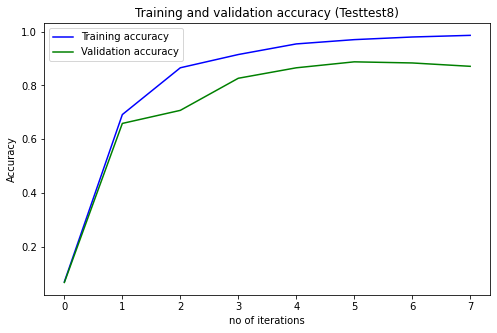

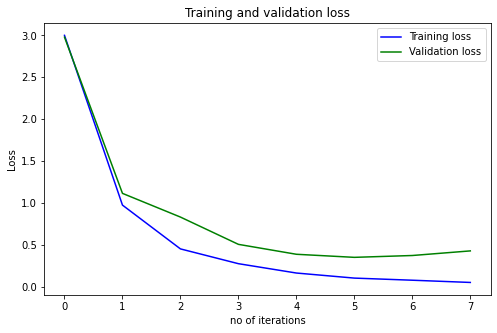

In [ ]:
import matplotlib.pyplot as plt

accuracy = []
val_accuracy = []
loss = []
val_loss = []
for x in range(len(sign_train_dropout.history['accuracy'])):
  if x%50==0:
    accuracy.append(sign_train_dropout.history['accuracy'][x])
    val_accuracy.append(sign_train_dropout.history['val_accuracy'][x])
    loss.append(sign_train_dropout.history['loss'][x])
    val_loss.append(sign_train_dropout.history['val_loss'][x])
    
epoch = range(len(accuracy))

plt.figure(figsize=(8,5))
plt.plot(epoch, accuracy, 'b', label='Training accuracy')
plt.plot(epoch, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy (Testtest8)')
plt.xlabel("no of iterations")
plt.ylabel("Accuracy")
plt.legend()

plt.figure(figsize=(8,5))
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("no of iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

**save model weights**

In [ ]:
sign_model.save_weights("/content/drive/MyDrive/PSL dataset/CNN_weights5.hdf5")

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import KFold

In [ ]:
  #CNN model
  sign_model = Sequential()
  sign_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(120,120,3)))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D((2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
  sign_model.add(LeakyReLU(alpha=0.1))                  
  sign_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
  sign_model.add(Dropout(0.4))
  sign_model.add(Flatten())
  sign_model.add(Dense(128, activation='linear'))
  sign_model.add(LeakyReLU(alpha=0.1))           
  sign_model.add(Dropout(0.4))
  sign_model.add(Dense(21, activation='softmax'))

In [ ]:
# loading the trained weights
sign_model.load_weights("/content/drive/MyDrive/PSL dataset/CNN_bg_weights.hdf5")

In [ ]:
# compiling the model
sign_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
sign_eval_dropout = sign_model.evaluate(X_test, test_Y_one_hot, verbose=1)

20/20 [==============================] - 0s 12ms/step - loss: 5.6700 - accuracy: 0.3132


In [ ]:
print('Test loss:', sign_eval_dropout[0])
print('Test accuracy:', sign_eval_dropout[1])

Test loss: 0.24627377092838287
Test accuracy: 0.9634340405464172


In [ ]:
import matplotlib.pyplot as plt

#plot training and validation accury as well as loss  
accuracy = sign_train_dropout.history['accuracy']
val_accuracy = sign_train_dropout.history['val_accuracy']
loss = sign_train_dropout.history['loss']
val_loss = sign_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(10,10))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Labels predicted**

In [ ]:
predicted_classes = sign_model.predict(X_test)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, y_test.shape

((1602,), (1602, 21))

In [ ]:
#correct labels predicted
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(120,120,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 1 incorrect labels


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


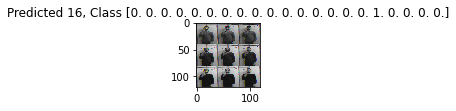

In [ ]:
#incorrect labels predicted
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(120,120,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

**Classification report**

In [ ]:
from sklearn.metrics import classification_report

#print classification report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         0
     Class 1       0.56      0.31      0.40        29
     Class 2       0.19      0.30      0.23        33
     Class 3       0.36      0.30      0.33        66
     Class 4       0.52      0.70      0.59        23
     Class 5       0.00      0.00      0.00        24
     Class 6       0.04      0.03      0.03        37
     Class 7       0.00      0.00      0.00        17
     Class 8       0.34      0.29      0.32        41
     Class 9       0.59      0.87      0.70        23
    Class 10       0.00      0.00      0.00        25
    Class 11       0.00      0.00      0.00        25
    Class 12       0.10      0.25      0.14        20
    Class 13       0.47      0.50      0.48        46
    Class 14       0.00      0.00      0.00        31
    Class 15       0.96      0.55      0.70        40
    Class 16       0.00      0.00      0.00        32
    Class 17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
